In [1]:
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

%matplotlib inline

<matplotlib.contour.QuadContourSet instance at 0x0963FE40>

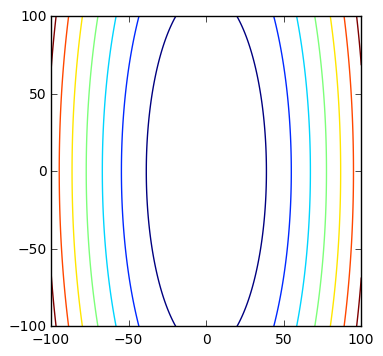

In [2]:
delta = 0.1
x = np.arange(-100.0, 100, delta)
y = np.arange(-100.0, 100.0, delta)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2/9
plt.gca().set_aspect('equal', adjustable='box')
plt.contour(X, Y, Z)

In [66]:
def test_func(inp):
    x, y = inp[0], inp[1]
    loss = x**2/0.01 + y**2/9
    dx = 2.0*x
    dy = 2.0*y/3.0
    return loss, np.array([dx, dy])

In [167]:
def sgd(func, init, lr=0.1, num_iter=100):
    loss = np.zeros(num_iter)
    opt_history = np.zeros((num_iter, init.shape[0]))
    inp = init
    for i in range(num_iter):
        opt_history[i] = inp
        loss[i], grad = func(inp)
        inp -= grad*lr
    return loss, opt_history

def momentum(func, init, lr=0.1, num_iter=100, beta=0.9):
    loss = np.zeros(num_iter)
    opt_history = np.zeros((num_iter, init.shape[0]))
    inp = init
    v = np.zeros_like(inp)
    for i in range(num_iter):
        opt_history[i] = inp
        loss[i], grad = func(inp)
        v = beta * v - lr * grad
        inp += v
    return loss, opt_history

def ada_grad(func, init, lr=0.1, num_iter=100):
    loss = np.zeros(num_iter)
    opt_history = np.zeros((num_iter, init.shape[0]))
    inp = init
    v = np.zeros_like(inp)
    for i in range(num_iter):
        opt_history[i] = inp
        loss[i], grad = func(inp)
        v += grad**2
        inp = inp - lr * grad / np.sqrt(v + 1e-7)
    return loss, opt_history

def rmsprop(func, init, lr=0.1, num_iter=100, beta=0.9):
    loss = np.zeros(num_iter)
    opt_history = np.zeros((num_iter, init.shape[0]))
    inp = init
    v = np.zeros_like(inp)
    for i in range(num_iter):
        opt_history[i] = inp
        loss[i], grad = func(inp)
        v = beta * v + (1 - beta) * grad ** 2
        inp = inp - lr * grad / np.sqrt(v + 1e-7)
    return loss, opt_history

def adam(func, init, lr=0.1, num_iter=100, beta_m=0.9, beta_v = 0.9):
    loss = np.zeros(num_iter)
    opt_history = np.zeros((num_iter, init.shape[0]))
    inp = init
    v = np.zeros_like(inp)
    m = np.zeros_like(inp)
    for i in range(num_iter):
        opt_history[i] = inp
        loss[i], grad = func(inp)
        m = beta_m * m + (1 - beta_m) * grad
        v = beta_v * v + (1 - beta_v) * grad ** 2
        inp -= lr * m / np.sqrt(v + 1e-7)
    return loss, opt_history

In [184]:
# loss, opt_history = sgd(test_func, np.array([100.0, 50.0]), lr=1.0, num_iter=100)
# loss, opt_history = momentum(test_func, np.array([100.0, 50.0]), lr=1.0, num_iter=100, beta=0.9)
# loss, opt_history = ada_grad(test_func, np.array([100.0, 50.0]), lr=10.0, num_iter=100)
# loss, opt_history = rmsprop(test_func, np.array([100.0, 50.0]), lr=10, num_iter=100, beta=0.1)
loss, opt_history = adam(test_func, np.array([100.0, 50.0]), lr=5, num_iter=100, beta_m=0.9, beta_v = 0.9)

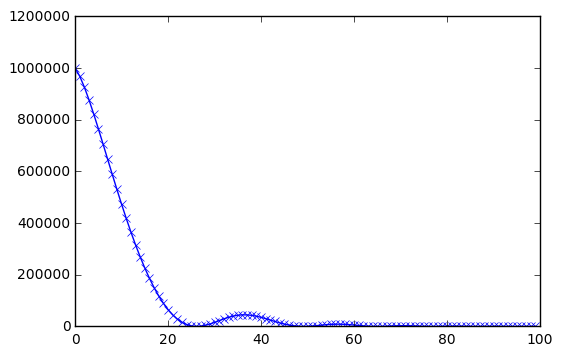

In [185]:
plt.plot(range(len(loss)), loss, 'bx-')

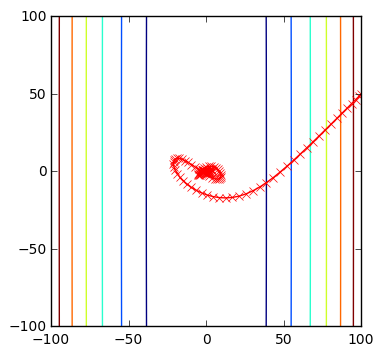

In [186]:
delta = 0.1
x = np.arange(-100.0, 100, delta)
y = np.arange(-100.0, 100.0, delta)
X, Y = np.meshgrid(x, y)
Z = X**2/0.01 + Y**2/9
# Z = test_func(X, Y)
plt.gca().set_aspect('equal', adjustable='box')
plt.contour(X, Y, Z)
plt.plot(opt_history[:, 0], opt_history[:, 1], 'rx-')
plt.show()

In [187]:
loss[-1]

225.90210380044311